**Name: Murad Smreteab Mebrahtu**

**ID: 100043387**

In [ ]:
# Apply machine learning to predict and avoid streetcar delays using TTC Streetcar Delay Data
'''Follow the Appendix B Machine Learning Project Checklist (uploaded to Content as pdf file) to develop a
detailed plan for the development of your application. Each item from the checklist must be discussed
and clearly specified how it will be handled in your project. Note, for “Shortlist Promising Models”
subsection, you should start with 8-10 models (must include neural networks and XGBoost) and reduce
to 3-5 best as per instructions.
The first deliverable must include at minimum all up to Shortlist Promising Models step.
The special focus of the final deliverable will be on how you have combined the best methods in order
to achieve significant performance boost.
Submission
Submit all versions of your program, results, and slides in a zipped directory named COSC606_Project2
_YourFirstAndLastName.zip and COSC606_ProjectFINAL _YourFirstAndLastName.zip. This project is to be
done individually. You are allowed to discuss, brainstorm, and consult each other with respect to any
issues or challenges, but all programming must be done individually. You will demo and present (15m)
your project results in class as per the schedule announced later. '''

'Follow the Appendix B Machine Learning Project Checklist (uploaded to Content as pdf file) to develop a\ndetailed plan for the development of your application. Each item from the checklist must be discussed\nand clearly specified how it will be handled in your project. Note, for “Shortlist Promising Models”\nsubsection, you should start with 8-10 models (must include neural networks and XGBoost) and reduce\nto 3-5 best as per instructions.\nThe first deliverable must include at minimum all up to Shortlist Promising Models step.\nThe special focus of the final deliverable will be on how you have combined the best methods in order\nto achieve significant performance boost.\nSubmission\nSubmit all versions of your program, results, and slides in a zipped directory named COSC606_Project2\n_YourFirstAndLastName.zip and COSC606_ProjectFINAL _YourFirstAndLastName.zip. This project is to be\ndone individually. You are allowed to discuss, brainstorm, and consult each other with respect to any\

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import csv
df_20= pd.concat(pd.read_excel('/content/drive/MyDrive/Project Machine Learning/ttc-streetcar-delay-data-2020.xlsx', sheet_name=None), ignore_index=True)
df_19 = pd.concat(pd.read_excel('/content/drive/MyDrive/Project Machine Learning/ttc-streetcar-delay-data-2019.xlsx', sheet_name=None), ignore_index=True)
df_18= pd.concat(pd.read_excel('/content/drive/MyDrive/Project Machine Learning/ttc-streetcar-delay-data-2018.xlsx', sheet_name=None), ignore_index=True)
df_17 = pd.concat(pd.read_excel('/content/drive/MyDrive/Project Machine Learning/ttc-streetcar-delay-data-2017.xlsx', sheet_name=None), ignore_index=True)
df_16 = pd.concat(pd.read_excel('/content/drive/MyDrive/Project Machine Learning/ttc-streetcar-delay-data-2016.xlsx', sheet_name=None), ignore_index=True)
df_15 = pd.concat(pd.read_excel('/content/drive/MyDrive/Project Machine Learning/ttc-streetcar-delay-data-2015.xlsx', sheet_name=None), ignore_index=True)
df_14 = pd.concat(pd.read_excel('/content/drive/MyDrive/Project Machine Learning/ttc-streetcar-delay-data-2014.xlsx', sheet_name=None), ignore_index=True)

In [ ]:
#Rename colums to have the same name 
#Report Date	, Route	,Time	, Day,	Location, Incident	, Min Delay, 	Min Gap	, Direction	, Vehicle
df_20 = df_20.rename(columns={'Delay': 'Min Delay' , 'Gap':'Min Gap'})
df_20.head()

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2020-01-01,504,01:23:00,Wednesday,King and Dufferin,Mechanical,8.0,16.0,E/B,4446.0
1,2020-01-01,512,04:40:00,Wednesday,Queen/Parliament,Mechanical,23.0,46.0,W/B,4541.0
2,2020-01-01,504,06:17:00,Wednesday,Roncesvalles and Queen,Mechanical,6.0,14.0,W/B,4576.0
3,2020-01-01,504,07:50:00,Wednesday,King/Church,Mechanical,10.0,20.0,W/B,4486.0
4,2020-01-01,504,08:09:00,Wednesday,Queeen/ Roncesvalles,Mechanical,8.0,16.0,E/B,4504.0


In [ ]:
# For 2019 different moths have different naming of the colums ...Min Gap and Min Delay are called gap and Delay in some moths
df_19_4=pd.read_excel('/content/drive/MyDrive/Project Machine Learning/ttc-streetcar-delay-data-2019.xlsx', sheet_name='Apr 2019')
df_19_6=pd.read_excel('/content/drive/MyDrive/Project Machine Learning/ttc-streetcar-delay-data-2019.xlsx', sheet_name='June 2019 ')
df_19_11=pd.read_excel('/content/drive/MyDrive/Project Machine Learning/ttc-streetcar-delay-data-2019.xlsx', sheet_name=' Nov 2019')
df_19_12=pd.read_excel('/content/drive/MyDrive/Project Machine Learning/ttc-streetcar-delay-data-2019.xlsx', sheet_name='Dec 2019')

# Months with the correct format
df_19_1=pd.read_excel('/content/drive/MyDrive/Project Machine Learning/ttc-streetcar-delay-data-2019.xlsx', sheet_name='Jan 2019 ')
df_19_2=pd.read_excel('/content/drive/MyDrive/Project Machine Learning/ttc-streetcar-delay-data-2019.xlsx', sheet_name='Feb 2019 ')
df_19_3=pd.read_excel('/content/drive/MyDrive/Project Machine Learning/ttc-streetcar-delay-data-2019.xlsx', sheet_name='Mar 2019 ')
df_19_5=pd.read_excel('/content/drive/MyDrive/Project Machine Learning/ttc-streetcar-delay-data-2019.xlsx', sheet_name='May 2019 ')
df_19_7=pd.read_excel('/content/drive/MyDrive/Project Machine Learning/ttc-streetcar-delay-data-2019.xlsx', sheet_name='July 2019 ')
df_19_8=pd.read_excel('/content/drive/MyDrive/Project Machine Learning/ttc-streetcar-delay-data-2019.xlsx', sheet_name='Aug, 2019 ')
df_19_9=pd.read_excel('/content/drive/MyDrive/Project Machine Learning/ttc-streetcar-delay-data-2019.xlsx', sheet_name='Sept 2019 ')
df_19_10=pd.read_excel('/content/drive/MyDrive/Project Machine Learning/ttc-streetcar-delay-data-2019.xlsx', sheet_name='Oct 2019 ')

In [ ]:
# concatinate data frames and change the format 
df_19_concat1 = pd.concat([df_19_4, df_19_6,df_19_11,df_19_12], ignore_index=True)
df_19_concat1= df_19_concat1.rename(columns={'Delay': 'Min Delay' , 'Gap':'Min Gap'})
df_19_concat2 = pd.concat([df_19_1, df_19_2,df_19_3,df_19_5,df_19_7,df_19_8,df_19_9,df_19_10], ignore_index=True)

# concatinate all sheets of 2019
df_19 = pd.concat([df_19_concat1,df_19_concat2], ignore_index=True)

# Remove the extra column : "Incident ID"
df_19 = df_19.drop(['Incident ID'], axis=1)

In [ ]:
df_all = pd.concat([df_14,df_15,df_16,df_17,df_18,df_19,df_20], ignore_index=True)

In [ ]:
df_all.dropna(axis=0, how='any',inplace=True)

The aim of this project is to predict if there is going to be delay of streetcar given the route, direction and time of departure.

In [ ]:
'''preparing trianing data
 First lets remove data that is not known at the prediction time.
 Those are the features that cause data leakage.
 Min Gap, Incident.

We want to predict the delay or if there is delay, before any incident happens, therefore 
Incident type and and Id are not used for training. If we wish to predict delay after a specific incident
happens then we can use the incident data as a feature. Similarly, Min Gap is not known until after an 
incident occurs and delay is caused, therefore it is removed as well. Those two are the main causes of 
data leakage.

 Moreover, location is also removed at this stage, since the given location is related to the incident.
 if the location data can be interpreted to corelate with routes such that we know which routes pass 
 through the incident location, we can  derive a new feature in relation to the route and incident 
 locations  from previous training data. Otherwise location as a feature serves no purposes since it is not
 known before prediction.
 For now location is ignored.
'''

'preparing trianing data\n First lets remove data that is not known at the prediction time.\n Those are the features that cause data leakage.\n Min Gap, Incident.\n\nWe want to predict the delay or if there is delay, before any incident happens, therefore \nIncident type and and Id are not used for training. If we wish to predict delay after a specific incident\nhappens then we can use the incident data as a feature. Similarly, Min Gap is not known until after an \nincident occurs and delay is caused, therefore it is removed as well. Those two are the main causes of \ndata leakage.\n\n Moreover, location is also removed at this stage, since the given location is related to the incident.\n if the location data can be interpreted to corelate with routes such that we know which routes pass \n through the incident location, we can  derive a new feature in relation to the route and incident \n locations  from previous training data. Otherwise location as a feature serves no purposes since i

In [ ]:
def timeTohour(t):
  x=t.split(':')
  return float(x[0])

In [ ]:
import warnings
warnings.filterwarnings("ignore")
df_selected=df_all[['Report Date','Route','Time','Day','Direction','Min Delay']]

# Dividing the Report date into year month and date
df_selected['Year'] = pd.DatetimeIndex(df_selected['Report Date']).year
df_selected['Month'] = pd.DatetimeIndex(df_selected['Report Date']).month
df_selected['Date'] = pd.DatetimeIndex(df_selected['Report Date']).day

# Remove the Report date data since we already have the data in three columns
df_selected.drop('Report Date',axis=1, inplace=True)

#change the time into slots of 24 hours
df_selected['Hour'] =[time.hour for time in df_selected['Time']]

# Remove the time data since we already have the hours
df_selected.drop('Time',axis=1, inplace=True)

# change the date name from text to numerical by encoding
df_selected['Day'],uniqueDays = pd.factorize(df_selected['Day'],sort=True)
print("Unique Days are: ", uniqueDays)

# Similarly, change the direction name from text to numerical by encoding
df_selected['Direction_factorized'],uniqueDirections = pd.factorize(df_selected['Direction'])
print("Number of Unique Directions is:", len(uniqueDirections))

# From the results, it is shown that there are around 90 unique directions. Only 5 directions should 
#exist , i.e EB,NB,SB,WB and both ways.... to avoid difference caused due to case sensitivity, the 
#directions are changed to lower case strings
df_selected['Direction']=df_selected['Direction'].astype(str)
df_selected['Direction']=df_selected['Direction'].apply(lambda x: x.lower())
print("Number of Unique Directions is: ", len(df_selected['Direction'].unique()))

Unique Days are:  Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')
Number of Unique Directions is: 90
Number of Unique Directions is:  73


In [ ]:
# Analize the direction data unique values after changing to lower case (73 unique values)
from collections import Counter
from operator import itemgetter
from collections import OrderedDict
unique_values=Counter(df_selected['Direction'])
sorted_unique_values = OrderedDict(sorted(unique_values.items(), key=itemgetter(1)))
print(sorted_unique_values)

OrderedDict([('southbound', 1), ('northbound', 1), ('b#', 1), ('we', 1), ('14', 1), ('0', 1), ('sw', 1), ('506', 1), ('54495', 1), ('4075', 1), ('bs', 1), ('wruiter adv', 1), ('(ref', 1), ('gap', 1), ('1114', 1), ('run', 1), ('ss', 1), ('19', 1), ('68029', 1), ('eb``', 1), ('512', 1), ('w`', 1), ('\\5', 1), ('7', 1), ('13', 1), ('-bd#', 1), ('`', 1), ('510', 1), ('w.b', 1), ('\\', 1), ('w\\b', 1), ('n', 1), ('20', 1), ('ee', 1), ('.', 1), ('see also', 1), ('e5', 1), ('relief operator. ga', 1), ('18', 1), ('15', 1), ('33', 1), ('nbn', 1), ('31087', 1), ('wn', 1), ('westbound', 2), ('service adjusted', 2), ('2', 2), ('6', 2), ('4', 2), ('30', 2), ('26', 2), ('3', 2), ('r', 2), ('s', 3), ('service adjusted.', 3), ('9', 3), ('10', 3), ('8', 3), ('ew', 6), ('5', 6), ('e', 7), ('eastbound', 8), ('w', 11), ('bw', 16), ('nb', 38), ('sb', 45), ('wb', 216), ('eb', 309), ('b/w', 3233), ('s/b', 5795), ('n/b', 5872), ('e/b', 30379), ('w/b', 31442)])


In [ ]:
#From the results of sorted the most significant errors are the following:
''' b/w ---instead of w/b 5347
    nan--empty 309 ---nothing can be done ---they should be removed
    wb--w/b 223
    sb--s/b 45
    nb--38
    bw--25
    The rest of the classes hold less than 20 elements each, with most having one element so they can be
    savely ignored
    '''
def correct_format(txt):
        if (txt=='wb'  or txt=='westbound'):
          return 'w/b'
        elif (txt=='sb' or txt=='southbound'):
          return 's/b'
        elif (txt=='nb' or txt=='northbound'):
          return 'n/b'
        elif (txt=='eb' or txt== 'eastbound'):
          return 'e/b'
        # elif (txt=='bw' or txt=='b/w' or txt=='b' or txt=='B'): # no streercars working both ways
        #   return 'e/w'
        else:
          return txt

In [ ]:
df_selected['Direction']= df_selected['Direction'].apply(lambda x: correct_format(x))
print("Number of Unique Directions is: ",len(df_selected['Direction'].unique()))
print("Data size is: ",df_selected.shape)

# by replacing the format of the most elements , the number of unique value was reduced to 65
# The total number of data entries is 77,460
# now that most of the important directions are set in either of the five categories, it is time to remove 
# the entries that are either empty or do not have the correct direction format

Number of Unique Directions is:  65
Data size is:  (77460, 9)


In [ ]:
directions_value={'s/b','n/b','e/b','w/b','e/w'}
def change_direction(txt):
    if (txt  in directions_value):
       return txt
    else:
       return 'NaN'     
df_selected['Direction']=df_selected['Direction'].apply(lambda x: change_direction(x))

In [ ]:
#Print  change results
print("Number of Unique Directions is: ",len(df_selected['Direction'].unique()))
print("Unique Directions are : ",df_selected['Direction'].unique())

Number of Unique Directions is:  5
Unique Directions are :  ['e/b' 'w/b' 's/b' 'n/b' 'NaN']


In [ ]:
# after changing the direction names, we have 6 direction names including 'NaN'
# we need to remove the 'NaN' values
df_selected.drop(df_selected[df_selected['Direction'] == 'NaN'].index, inplace = True)
print("Data size is: ",df_selected.shape)

# Rest the index to represent the number of rows
df_selected.reset_index(drop=True, inplace=True)

# remove direction factorization and instead replace direction by actual encoded data
df_selected.drop('Direction_factorized',axis=1,inplace=True)

# encode Direction
df_selected['Direction'],uniqueDirections=pd.factorize(df_selected['Direction'],sort=True)
print(" Unique Directions order is:", uniqueDirections)
df_tester=df_selected[['Route','Day','Direction','Year','Month','Date','Hour']]

Data size is:  (74108, 9)
 Unique Directions order is: Index(['e/b', 'n/b', 's/b', 'w/b'], dtype='object')


After the data cleansing stage 77,357 data entries are left. each with 7 features, i.e Route	Day	Direction	Year	Month	Date	Hour.

Top 20 routes with the highest data
AxesSubplot(0.125,0.125;0.775x0.755)


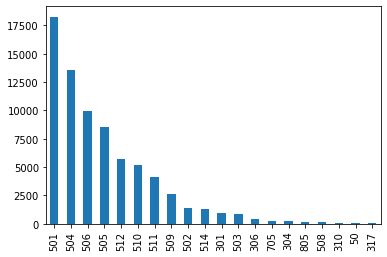

In [ ]:
#number of unquie routes 
# Currently the avilable Rotes are 501,503,504,505,506,508,509,510,511,512
availabe_routes=[501,503,504,505,506,508,509,510,511,512,301,304,306,310]
x=df_selected['Route'].value_counts()
print("Top 20 routes with the highest data")
print(x[0:20].plot(kind='bar'))
#print(df_selected['Route'].value_counts().plot(kind='bar'))
#print(df_selected['Route'].nunique())
#df_selected.Route.unique()

In [ ]:
def change_routes(route):
    if (route  in availabe_routes):
       return route
    else:
       return 'NaN'     
df_selected['Route']=df_selected['Route'].apply(lambda x: change_routes(x))
print("Number of unique routes is: ",len(df_selected.Route.unique()))

Number of unique routes is:  15


In [ ]:
# after changing the route names, we have 15 route names including 'NaN' (from print above)
# we need to remove the 'NaN' values
df_selected.drop(df_selected[df_selected['Route'] == 'NaN'].index, inplace = True)
print("Data size is: ",df_selected.shape)
df_selected.head()

Data size is:  (70642, 8)


,Route,Day,Direction,Min Delay,Year,Month,Date,Hour
0,505,4,0,4.0,2014,1,2,6
1,504,4,0,20.0,2014,1,2,12
2,501,4,3,13.0,2014,1,2,14
3,504,4,3,7.0,2014,1,2,14
4,504,4,0,3.0,2014,1,2,16


AxesSubplot(0.125,0.125;0.775x0.755)


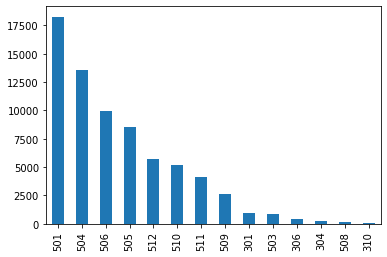

In [ ]:
print(df_selected['Route'].value_counts().plot(kind='bar'))

After removing routes that are not currently functional, the data is reduced by 4.7% with  73,717  entries left.

,Route,Day,Direction,Min Delay,Year,Month,Date,Hour
0,505,4,0,4.0,2014,1,2,6
1,504,4,0,20.0,2014,1,2,12
2,501,4,3,13.0,2014,1,2,14
3,504,4,3,7.0,2014,1,2,14
4,504,4,0,3.0,2014,1,2,16
...,...,...,...,...,...,...,...,...
74103,501,3,3,10.0,2020,7,26,12
74104,301,1,0,25.0,2020,7,27,2
74105,306,1,0,19.0,2020,7,27,2
74106,504,1,0,10.0,2020,8,3,0


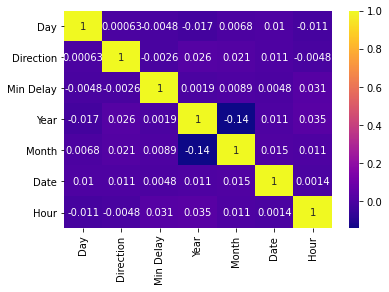

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_selected.corr(),annot = True,cmap= 'plasma')
df_selected

In [ ]:
''' From the correlation plot we can see that there is small to none correlation between the features 
and the delay at a route. Moreover the data currently avilable is only for the times when accident happened
so it can only be used to predict the expected delay when an incident occurs and the prediction is done
after the fact. 

Just to see the results of a model trained to predict the time delay without incident information, 
a polynomial regression model is trained.
'''

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm

df_x=df_selected[['Route','Hour','Month','Day','Direction']]
df_y=df_selected[['Min Delay']]
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,train_size = 0.8)

poly = PolynomialFeatures(degree=4)
x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)

# Instantiate
reg = LinearRegression()

# Fit
reg.fit(x_train, y_train)
# reg.fit(x_train,y_train)
y_test_pred= reg.predict(x_test)

#Result analysis
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 9.17
Mean squared error = 606.09
Median absolute error = 5.89
Explain variance score = 0.0
R2 score = 0.0


In [ ]:
'''From the results of the above model, it can be observed that it is unrealstic and inaccurate to predict 
the delay time expected just from the route,date,direction and time. 
Moreover, as mentioned above, the model uses data that contains delays only, so it can not predict no 
delay, therefore it is not the best application of the data for prediction.


The best use of the given data is to predict if there is going to be a delay or not (binary classification)
on a specific route going to a specific direction at a specific time.
To do this however we will need to add the missing information of no delay times
 (when the Streetcar actually arrived on time). This means adding each hour of everyday from 2014 until
 Aguest 202o of each route going to each direction. If an entry exists in the delay data already then its 
 output is 1 which means delay, if a certain combination of the input features, however, is not on the
 delay data entries, then it is added to the training data with output of 0.
 
 By doing this we train the model when to expect delays and when not to. In the next section, the 
 training data containing all the mentioned data will be prepared and used to train different clasification
 models. '''

'From the results of the above model, it can be observed that it is unrealstic and inaccurate to predict \nthe delay time expected just from the route,date,direction and time. \nMoreover, as mentioned above, the model uses data that contains delays only, so it can not predict no \ndelay, therefore it is not the best application of the data for prediction.\n\n\nThe best use of the given data is to predict if there is going to be a delay or not (binary classification)\non a specific route going to a specific direction at a specific time.\nTo do this however we will need to add the missing information of no delay times\n (when the Streetcar actually arrived on time). This means adding each hour of everyday from 2014 until\n Aguest 202o of each route going to each direction. If an entry exists in the delay data already then its \n output is 1 which means delay, if a certain combination of the input features, however, is not on the\n delay data entries, then it is added to the training data

In [ ]:
# As mentioned all the timeslots, directions,routes should be considered.
#However not all combinations are valid, example some routes are south /north bound and others
#are east/west bound, therefore there should be two separate cobinatorial cases.
#Interms of working hours, i am assuming all of them work 24/7
#Moreover assigning day name is also important, On the 1st of january it was Wednesday, so it should 
#iterate through the days
import pandas as pd
south_north_routes=[510,511,512,310]
south_north_direc=['s/b','n/b']
east_west_routes=[501,503,504,505,506,508,509,301,304,306]
east_west_direc={'e/b','w/b'}

years=[2014,2015,2016,2017,2018,2019,2020]
hours= [*range(1, 25, 1)]
tempList=[]
day_order= [ 'Wednesday','Thursday', 'Friday','Saturday', 'Sunday','Monday', 'Tuesday']
def produce_data(av_routes,bound):
    day_counter=0
    for r in av_routes:
        for b in bound:
            day_counter=0
            for y in years:
                months= [*range(1, 13, 1)]
                if (y==2020):
                   months= [*range(1, 8, 1)] # Data found only until Auguest
                for m in months:
                    days= [*range(1, 32, 1)]
                    if ((((m % 2) == 0 and m<8) and m!=2) or (m==9) or (m==11)):
                    # if it is even month and before Auguest then it has 30 days
                       days = [*range(1, 31, 1)]
                    elif (m==2 and (y==2016 or y==2020)): # february case with leap year
                       days = [*range(1, 30, 1)]
                    elif (m==2): # february case without leap year
                       days = [*range(1, 29, 1)]
                    # The rest of the months will have the deafult 31 days
                    for d in days:
                        day_counter+=1
                        for h in hours:
                          day_temp=(day_counter-1)%7
                          temp={"Route":r,"Direction": b,"Day": day_order[day_temp],"Year":y,"Month":m,"Date":d,"Hour":h}
                          tempList.append(temp)


produce_data(south_north_routes,south_north_direc) 
produce_data(east_west_routes,east_west_direc) 
df_all_cases = pd.DataFrame(data=tempList,columns=['Route','Direction','Day', 'Year', 'Month','Date','Hour']) #columns=['availabe_routes', 'years', 'months','days']
# df_all_cases.reset_index(inplace=True)

df_all_cases.info()
# # df_all_cases[0:100]
# df_all_cases.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615488 entries, 0 to 1615487
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Route      1615488 non-null  int64 
 1   Direction  1615488 non-null  object
 2   Day        1615488 non-null  object
 3   Year       1615488 non-null  int64 
 4   Month      1615488 non-null  int64 
 5   Date       1615488 non-null  int64 
 6   Hour       1615488 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 86.3+ MB


In [ ]:
print(len(df_all_cases))

1615488


In [ ]:
df_all_cases.tail(10) # checking if the february cases and Auguest 2020 are handled properly

,Route,Direction,Day,Year,Month,Date,Hour
1615478,306,e/b,Friday,2020,7,31,15
1615479,306,e/b,Friday,2020,7,31,16
1615480,306,e/b,Friday,2020,7,31,17
1615481,306,e/b,Friday,2020,7,31,18
1615482,306,e/b,Friday,2020,7,31,19
1615483,306,e/b,Friday,2020,7,31,20
1615484,306,e/b,Friday,2020,7,31,21
1615485,306,e/b,Friday,2020,7,31,22
1615486,306,e/b,Friday,2020,7,31,23
1615487,306,e/b,Friday,2020,7,31,24


In [ ]:
# the direction and day should be changed to numeric value 
# From earlier encoding we have uniqueDirections that contains the encoding of the directions
df_all_cases['Direction'],AlluniqueDirections = pd.factorize(df_all_cases['Direction'],sort=True)

print(AlluniqueDirections)    # Direction encoding for  all cases
print(uniqueDirections)          # Direction encoding for  delay cases

df_all_cases['Day'],AlluniqueDays = pd.factorize(df_all_cases['Day'],sort=True)

print(AlluniqueDays)    # Days encoding for  all cases
print(uniqueDays)          # Direction encoding for  delay cases

# The result shows that the encoding is the same 

Index(['e/b', 'n/b', 's/b', 'w/b'], dtype='object')
Index(['e/b', 'n/b', 's/b', 'w/b'], dtype='object')
Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')
Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')


In [ ]:
'''Now that all the possible hours between 2014 and 2020 are covered
The total number of training data is  1,615,488
The only thing left is to add the target feature, delay
From the streecar data given , we have around  70,642  delay records
For the 70,642 cases, the delay is 1 (which means there is delay)
For the rest, delay is zero
 To add the delay vaiable, at first all rows will have no delay (0)
Then if the a specific date and time is found in the delay dataframe, 
Its delay will be updated by 1'''

'Now that all the possible hours between 2014 and 2020 are covered\nThe total number of training data is  1,615,488\nThe only thing left is to add the target feature, delay\nFrom the streecar data given , we have around  70,642  delay records\nFor the 70,642 cases, the delay is 1 (which means there is delay)\nFor the rest, delay is zero\n To add the delay vaiable, at first all rows will have no delay (0)\nThen if the a specific date and time is found in the delay dataframe, \nIts delay will be updated by 1'

In [ ]:
df_delayed=df_selected[['Route','Direction','Day','Year','Month','Date','Hour']] # Delayed occations
df_delayed.reset_index(drop=True,inplace=True)
print(df_delayed.info())
df_delayed
#df1 = df[df.duplicated('code', keep=False)].sort_values('code')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70642 entries, 0 to 70641
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Route      70642 non-null  object
 1   Direction  70642 non-null  int64 
 2   Day        70642 non-null  int64 
 3   Year       70642 non-null  int64 
 4   Month      70642 non-null  int64 
 5   Date       70642 non-null  int64 
 6   Hour       70642 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ MB
None


,Route,Direction,Day,Year,Month,Date,Hour
0,505,0,4,2014,1,2,6
1,504,0,4,2014,1,2,12
2,501,3,4,2014,1,2,14
3,504,3,4,2014,1,2,14
4,504,0,4,2014,1,2,16
...,...,...,...,...,...,...,...
70637,501,3,3,2020,7,26,12
70638,301,0,1,2020,7,27,2
70639,306,0,1,2020,7,27,2
70640,504,0,1,2020,8,3,0


In [ ]:
#df_delayed['Delay']=1
# concatinate the two dataframes ...index 0-70641 will have the delay entries
frames = [df_delayed,df_all_cases]
resulted = pd.concat(frames)
resulted.reset_index(drop=True,inplace=True)
resulted[:70643]

,Route,Direction,Day,Year,Month,Date,Hour
0,505,0,4,2014,1,2,6
1,504,0,4,2014,1,2,12
2,501,3,4,2014,1,2,14
3,504,3,4,2014,1,2,14
4,504,0,4,2014,1,2,16
...,...,...,...,...,...,...,...
70638,301,0,1,2020,7,27,2
70639,306,0,1,2020,7,27,2
70640,504,0,1,2020,8,3,0
70641,501,3,1,2020,8,3,23


In [ ]:
# find duplicates
resulted['Duplicate']=resulted.duplicated()
resulted.shape

(1686130, 8)

In [ ]:
# find duplicates
counted=Counter(resulted['Duplicate'])
print(counted)

Counter({False: 1626284, True: 59846})


In [ ]:
# Add delay
resulted.loc[0 :70641,'Delay'] = 1
resulted.loc[70642 :,'Delay'] = 0
resulted

,Route,Direction,Day,Year,Month,Date,Hour,Duplicate,Delay
0,505,0,4,2014,1,2,6,False,1.0
1,504,0,4,2014,1,2,12,False,1.0
2,501,3,4,2014,1,2,14,False,1.0
3,504,3,4,2014,1,2,14,False,1.0
4,504,0,4,2014,1,2,16,False,1.0
...,...,...,...,...,...,...,...,...,...
1686125,306,0,0,2020,7,31,20,False,0.0
1686126,306,0,0,2020,7,31,21,False,0.0
1686127,306,0,0,2020,7,31,22,False,0.0
1686128,306,0,0,2020,7,31,23,False,0.0


In [ ]:
#Remove Duplicates
resulted.drop(resulted[resulted['Duplicate'] ==True].index, inplace = True)
resulted.reset_index(drop=True,inplace=True)
counted=Counter(resulted['Duplicate'])
print(counted)
#remove unnecessary column
resulted.drop(["Duplicate"],axis=1,inplace=True)
#sort by time
resulted.sort_values(by=['Year','Month','Date','Hour'], inplace=True)
resulted.reset_index(drop=True,inplace=True)
resulted

Counter({False: 1626284})


,Route,Direction,Day,Year,Month,Date,Hour,Delay
0,510,2,6,2014,1,1,1,0.0
1,510,1,6,2014,1,1,1,0.0
2,511,2,6,2014,1,1,1,0.0
3,511,1,6,2014,1,1,1,0.0
4,512,2,6,2014,1,1,1,0.0
...,...,...,...,...,...,...,...,...
1626279,304,0,0,2020,7,31,24,0.0
1626280,306,3,0,2020,7,31,24,0.0
1626281,306,0,0,2020,7,31,24,0.0
1626282,504,0,1,2020,8,3,0,1.0


AxesSubplot(0.125,0.125;0.775x0.755)


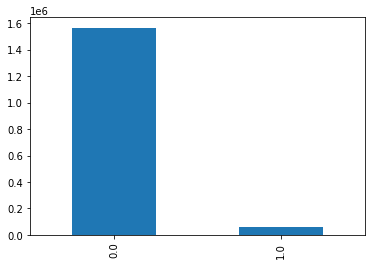

In [ ]:
print(resulted['Delay'].value_counts().plot(kind='bar'))

In [ ]:
# Now that all the data is merged, we have 1,626,284 entries 
# Note: there is huge class imbalance but lets see what would happen if we train in such situation
# The next step is to prepare the training and testing data
input_df=resulted[['Route','Direction','Day','Year','Month','Date','Hour']]
output_df=resulted[['Delay']]
train_x, test_x, train_y, test_y = train_test_split(input_df,output_df,train_size = 0.7)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
logistic_model1 = LogisticRegression(random_state=0).fit(train_x, train_y)

Model accuracy:96.25% 
Model precision:0.00% 
Model Recall:0.00% 
Model F1_score:0.00% 


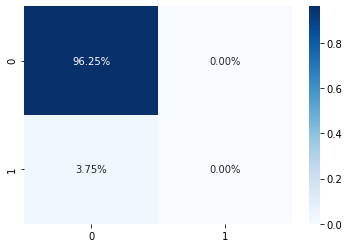

In [ ]:
# Test model on the test data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import numpy as np
model1_prediction=logistic_model1.predict(test_x)
cf_matrix=confusion_matrix( test_y,model1_prediction)

labels = ['True Neg','False Pos','False Neg','True Pos']
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
print("Model accuracy:{0:.2f}% ".format(logistic_model1.score(test_x, test_y)*100))
print("Model precision:{0:.2f}% ".format(precision_score(test_y,model1_prediction,average='binary')*100))
print("Model Recall:{0:.2f}% ".format(recall_score(test_y,model1_prediction)*100))
print("Model F1_score:{0:.2f}% ".format(f1_score(test_y,model1_prediction)*100))

AxesSubplot(0.125,0.125;0.775x0.755)


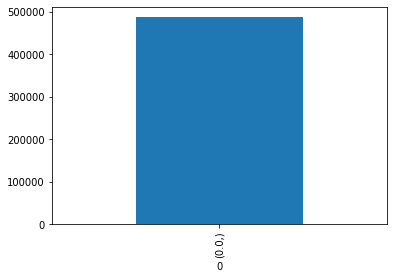

In [ ]:
# The accuracy seems to be extremly good but lets check the results of the prediction
temp_df=pd.DataFrame(data=model1_prediction)
print(temp_df.value_counts().plot(kind='bar'))

In [ ]:
'''From the prediction results we can see that the model is predicting everything as 0 (no delay)
Since there is huge class imbalance (1:23), we get high accuracy (but zero recall and f1_score) even by predicting all as no delay
To tackle this issue we will use oversampling (Random oversampling involves randomly duplicating 
examples from the minority class and adding them to the training dataset.)
After oversamling, the total training data will contain around the same data entries from both classes'''

'From the prediction results we can see that the model is predicting everything as 0 (no delay)\nSince there is huge class imbalance (1:23), we get high accuracy (but zero recall and f1_score) even by predicting all as no delay\nTo tackle this issue we will use oversampling (Random oversampling involves randomly duplicating \nexamples from the minority class and adding them to the training dataset.)\nAfter oversamling, the total training data will contain around the same data entries from both classes'

In [ ]:
# define oversampling strategy
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
# fit and apply the transform
# We should sample after dividing the training and testing data because we don't want duplicates of
# same entry on both test and training data, 
# earlier the data was divided to training and test data with 30% for testing.
# here, both training and testing data are sampled separately
train_x_oversampled, train_y_oversampled = oversample.fit_resample(train_x, train_y)
test_x_oversampled, test_y_oversampled = oversample.fit_resample(test_x, test_y)
# dx_over=pd.DataFrame(data=train_newx_over)
# dx=pd.DataFrame(data=train_x)
print("training data size before over sampling: ", len(train_x))
print("training data size after over sampling: ",len( train_x_oversampled))
print("//////////////////////////////////////////////////////////////////////////////////// ")
print("test data size before over sampling: ", len(test_x))
print("test data size after over sampling: ",len( test_x_oversampled))

training data size before over sampling:  1138398
training data size after over sampling:  2190140
//////////////////////////////////////////////////////////////////////////////////// 
test data size before over sampling:  487886
test data size after over sampling:  939190


In [ ]:
#logistic regression model
logistic_model2 = LogisticRegression(random_state=0).fit(train_x_oversampled, train_y_oversampled)
model2_prediction=logistic_model2.predict(test_x_oversampled)
print("Model accuracy:{0:.2f}% ".format(logistic_model2.score(test_x_oversampled, test_y_oversampled)*100))
print("Model precision:{0:.2f}% ".format(precision_score(test_y_oversampled,model2_prediction)*100))
print("Model Recall:{0:.2f}% ".format(recall_score(test_y_oversampled,model2_prediction)*100))
print("Model F1_score:{0:.2f}% ".format(f1_score(test_y_oversampled,model2_prediction)*100))

Model accuracy:63.57% 
Model precision:58.14% 
Model Recall:96.93% 
Model F1_score:72.68% 


AxesSubplot(0.125,0.125;0.775x0.755)


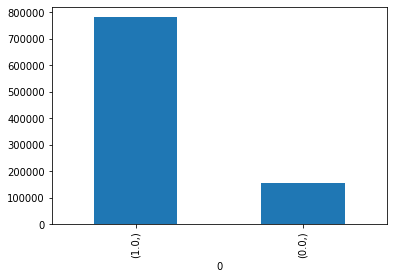

In [ ]:
temp_df=pd.DataFrame(data=model2_prediction)
print(temp_df.value_counts().plot(kind='bar'))

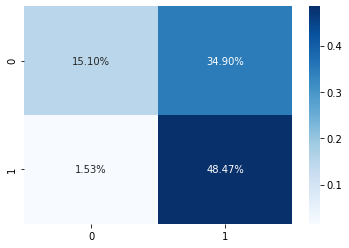

In [ ]:
# Lets see the confusion matrix of the predicions
model2_predicted=logistic_model2.predict(test_x_oversampled)
cf_matrix=confusion_matrix( test_y_oversampled,model2_predicted)
labels = ['True Neg','False Pos','False Neg','True Pos']
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
# From above graph using oversampling , an accuracy of 63.54% is found
# True postive = 48.56 % True Negative = 14.91%  False Negative= 1.44% and False postive = 35.09% 
# our model seems to be biased towards predicting 1 instead of zero, 83% of the predictions are 1
# lets try undersampling
# define undersample strategy
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
train_x_undersampled, train_y_undersampled = undersample.fit_resample(train_x, train_y)
test_x_undersampled, test_y_undersampled = undersample.fit_resample(test_x, test_y)
# dx_over=pd.DataFrame(data=train_newx_over)
# dx=pd.DataFrame(data=train_x)
print("training data size before undersampling: ", len(train_x))
print("training data size after undersampling: ",len( train_x_undersampled))
print("//////////////////////////////////////////////////////////////////////////////////// ")
print("test data size before undersampling: ", len(test_x))
print("test data size after undersampling: ",len( test_x_undersampled))

training data size before undersampling:  1138398
training data size after undersampling:  86656
//////////////////////////////////////////////////////////////////////////////////// 
test data size before undersampling:  487886
test data size after undersampling:  36582


In [ ]:
#logistic regression model for undersampled data
logistic_model3 = LogisticRegression(random_state=0).fit(train_x_undersampled, train_y_undersampled)
model3_prediction=logistic_model3.predict(test_x_undersampled)
print("Model accuracy:{0:.2f}% ".format(logistic_model3.score(test_x_undersampled, test_y_undersampled)*100))
print("Model precision:{0:.2f}% ".format(precision_score(test_y_undersampled,model3_prediction)*100))
print("Model Recall:{0:.2f}% ".format(recall_score(test_y_undersampled,model3_prediction)*100))
print("Model F1_score:{0:.2f}% ".format(f1_score(test_y_undersampled,model3_prediction)*100))

Model accuracy:63.57% 
Model precision:58.15% 
Model Recall:96.86% 
Model F1_score:72.67% 


In [ ]:
# The accuracy of both oversampled and undersampled data is around 63%
# lets try a combination of both 
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.1) # this will change the ratio to 1:1o
# fit and apply the transform
train_x_sampleA, train_y_sampleA = undersample.fit_resample(train_x, train_y)
test_x_sampleA, test_y_sampleA = undersample.fit_resample(test_x, test_y)
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.5)  # this will change the ratio to 1:2
# fit and apply the transform
train_x_sampled, train_y_sampled = undersample.fit_resample(train_x_sampleA, train_y_sampleA)
test_x_sampled, test_y_sampled = undersample.fit_resample(test_x_sampleA, test_y_sampleA)

print("training data size before sampling: ", len(train_x))
print("training data size after sampling: ",len( train_x_sampled))
print("//////////////////////////////////////////////////////////////////////////////////// ")
print("test data size before sampling: ", len(test_x))
print("test data size after sampling: ",len( test_x_sampled))

training data size before sampling:  1138398
training data size after sampling:  86656
//////////////////////////////////////////////////////////////////////////////////// 
test data size before sampling:  487886
test data size after sampling:  36582


In [ ]:
#logistic regression model for undersampled data
logistic_model4 = LogisticRegression(random_state=0).fit(train_x_sampled, train_y_sampled)
model4_prediction=logistic_model4.predict(test_x_sampled)
print("Model accuracy:{0:.2f}% ".format(logistic_model4.score(test_x_sampled, test_y_sampled)*100))
print("Model precision:{0:.2f}% ".format(precision_score(test_y_sampled,model4_prediction)*100))
print("Model Recall:{0:.2f}% ".format(recall_score(test_y_sampled,model4_prediction)*100))
print("Model F1_score:{0:.2f}% ".format(f1_score(test_y_sampled,model4_prediction)*100))

Model accuracy:63.56% 
Model precision:58.15% 
Model Recall:96.69% 
Model F1_score:72.63% 


In [ ]:
'''  using three sampling methods, the result of using logistic regression for classifications gives around
63% accuracy in each of the tree models, for the rest of the models tested, the last sampling method
(combination of over sampling and undersampling in model 4) is used for training other models.
'''

'  using three sampling methods, the result of using logistic regression for classifications gives around\n63% accuracy in each of the tree models, for the rest of the models tested, the last sampling method\n(combination of over sampling and undersampling in model 4) is used for training other models.\n'

In [ ]:
# from sklearn.svm import SVC
# svm_model5 =  SVC(gamma='auto')
# svm_model5.fit(train_x_sampled, train_y_sampled)
# print("Model accuracy:{0:.2f}% ".format(svm_model5.score(test_x_sampled, test_y_sampled)*100))

# SVM was removed because it took significantly more time (>10 mins) for training compared to other models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model5 = KNeighborsClassifier(n_neighbors=3)
KNN_model5.fit(train_x_sampled, train_y_sampled)
model5_prediction=KNN_model5.predict(test_x_sampled)
print("Model accuracy:{0:.2f}% ".format(KNN_model5.score(test_x_sampled, test_y_sampled)*100))
print("Model precision:{0:.2f}% ".format(precision_score(test_y_sampled,model5_prediction)*100))
print("Model Recall:{0:.2f}% ".format(recall_score(test_y_sampled,model5_prediction)*100))
print("Model F1_score:{0:.2f}% ".format(f1_score(test_y_sampled,model5_prediction)*100))

Model accuracy:70.44% 
Model precision:69.26% 
Model Recall:73.52% 
Model F1_score:71.33% 


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
decisionTree_model6= DecisionTreeClassifier()
decisionTree_model6.fit(train_x_sampled, train_y_sampled)

model6_prediction=decisionTree_model6.predict(test_x_sampled)
print("Model accuracy:{0:.2f}% ".format(decisionTree_model6.score(test_x_sampled, test_y_sampled)*100))
print("Model precision:{0:.2f}% ".format(precision_score(test_y_sampled,model6_prediction)*100))
print("Model Recall:{0:.2f}% ".format(recall_score(test_y_sampled,model6_prediction)*100))
print("Model F1_score:{0:.2f}% ".format(f1_score(test_y_sampled,model6_prediction)*100))

Model accuracy:74.38% 
Model precision:74.21% 
Model Recall:74.73% 
Model F1_score:74.47% 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomForest_model7= RandomForestClassifier()
randomForest_model7.fit(train_x_sampled, train_y_sampled)
model7_prediction=randomForest_model7.predict(test_x_sampled)
print("Model accuracy:{0:.2f}% ".format(randomForest_model7.score(test_x_sampled, test_y_sampled)*100))
print("Model precision:{0:.2f}% ".format(precision_score(test_y_sampled,model7_prediction)*100))
print("Model Recall:{0:.2f}% ".format(recall_score(test_y_sampled,model7_prediction)*100))
print("Model F1_score:{0:.2f}% ".format(f1_score(test_y_sampled,model7_prediction)*100))

#Save results for comparison with the fine tuned model

rf_baseline_performace = {'accuracy':(randomForest_model7.score(test_x_sampled, test_y_sampled)*100),
                           'precision':(precision_score(test_y_sampled,model7_prediction)*100),
                          'recall':(recall_score(test_y_sampled,model7_prediction)*100),
                           'f1_score':(f1_score(test_y_sampled,model7_prediction)*100)}

Model accuracy:79.66% 
Model precision:77.82% 
Model Recall:82.96% 
Model F1_score:80.31% 


AxesSubplot(0.125,0.125;0.775x0.755)


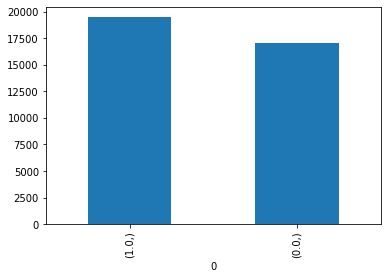

In [ ]:
temp_df=pd.DataFrame(data=model7_prediction)
print(temp_df.value_counts().plot(kind='bar'))

In [ ]:
import tensorflow as tf 

neuralNetwork_model8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(test_x_sampled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),   
    tf.keras.layers.Dense(2,activation='softmax')
])

neuralNetwork_model8.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
train_x_sampled=np.array(train_x_sampled, dtype=np.float)
train_y_sampled=np.array(train_y_sampled, dtype=np.float)

# x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(train_x_sampled,train_y_sampled,train_size = 0.8)

#history=neuralNetwork_model8.fit(train_x_sampled, train_y_sampled,epochs=20,verbose=2,validation_split=0.3,validation_batch_size=100)
history=neuralNetwork_model8.fit(train_x_sampled,train_y_sampled,steps_per_epoch=100, epochs = 100,verbose=2)

Epoch 1/100
100/100 - 1s - loss: 3.7543 - accuracy: 0.5663
Epoch 2/100
100/100 - 0s - loss: 0.7900 - accuracy: 0.5910
Epoch 3/100
100/100 - 0s - loss: 0.7104 - accuracy: 0.5905
Epoch 4/100
100/100 - 0s - loss: 0.7398 - accuracy: 0.5894
Epoch 5/100
100/100 - 0s - loss: 0.6924 - accuracy: 0.5856
Epoch 6/100
100/100 - 0s - loss: 0.7533 - accuracy: 0.5858
Epoch 7/100
100/100 - 0s - loss: 0.6642 - accuracy: 0.5918
Epoch 8/100
100/100 - 0s - loss: 0.6537 - accuracy: 0.5930
Epoch 9/100
100/100 - 0s - loss: 0.7208 - accuracy: 0.5804
Epoch 10/100
100/100 - 0s - loss: 0.6924 - accuracy: 0.5817
Epoch 11/100
100/100 - 0s - loss: 0.6686 - accuracy: 0.5854
Epoch 12/100
100/100 - 0s - loss: 0.7209 - accuracy: 0.5790
Epoch 13/100
100/100 - 0s - loss: 0.7210 - accuracy: 0.5859
Epoch 14/100
100/100 - 0s - loss: 0.6925 - accuracy: 0.5978
Epoch 15/100
100/100 - 0s - loss: 0.6664 - accuracy: 0.5904
Epoch 16/100
100/100 - 0s - loss: 0.6771 - accuracy: 0.5823
Epoch 17/100
100/100 - 0s - loss: 0.6810 - accura

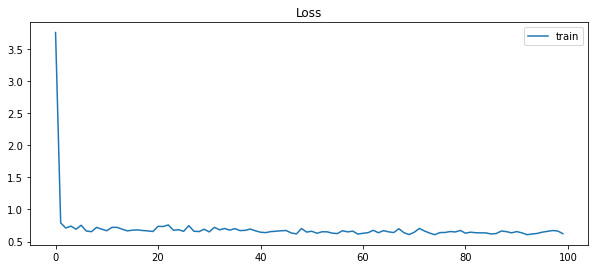

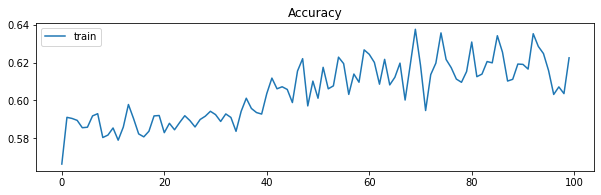

In [ ]:
# plot loss during training
from matplotlib import pyplot
# plot loss during training
plt.figure(figsize=(10,9))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
# plot accuracy during training
plt.figure(figsize=(10,6))
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
# pyplot.plot(history.history['val_accuracy'], label='validation')
pyplot.legend()
pyplot.show()

In [ ]:
test_x_sampled=np.array(test_x_sampled, dtype=np.float)
test_y_sampled=np.array(test_y_sampled, dtype=np.float)
test_loss, test_acc = neuralNetwork_model8.evaluate(test_x_sampled,  test_y_sampled, verbose=2)
# loss='binary_crossentropy',
print('\nTest accuracy:', test_acc)
print("Model accuracy:{0:.2f}% ".format((test_acc)*100))

1144/1144 - 2s - loss: 0.5912 - accuracy: 0.6520

Test accuracy: 0.6520419716835022
Model accuracy:65.20% 


In [ ]:
from xgboost import XGBClassifier
xgboost_model9= XGBClassifier()
xgboost_model9.fit(train_x_sampled, train_y_sampled)
model9_prediction=xgboost_model9.predict(test_x_sampled)
print("Model accuracy:{0:.2f}% ".format(xgboost_model9.score(test_x_sampled, test_y_sampled)*100))
print("Model precision:{0:.2f}% ".format(precision_score(test_y_sampled,model9_prediction)*100))
print("Model Recall:{0:.2f}% ".format(recall_score(test_y_sampled,model9_prediction)*100))
print("Model F1_score:{0:.2f}% ".format(f1_score(test_y_sampled,model9_prediction)*100))

#Save results for comparison with the fine tuned model

xgb_baseline_performace = {'accuracy':(xgboost_model9.score(test_x_sampled, test_y_sampled)*100),
                           'precision':(precision_score(test_y_sampled,model9_prediction)*100),
                          'recall':(recall_score(test_y_sampled,model9_prediction)*100),
                           'f1_score':(f1_score(test_y_sampled,model9_prediction)*100)}

Model accuracy:79.30% 
Model precision:76.44% 
Model Recall:84.70% 
Model F1_score:80.36% 


In [ ]:
# temp_df=pd.DataFrame(data=model9_prediction)
# print(temp_df.value_counts().plot(kind='bar'))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad_model10= GradientBoostingClassifier()
grad_model10.fit(train_x_sampled, train_y_sampled)
model10_prediction=grad_model10.predict(test_x_sampled)
print("Model accuracy:{0:.2f}% ".format(grad_model10.score(test_x_sampled, test_y_sampled)*100))
print("Model precision:{0:.2f}% ".format(precision_score(test_y_sampled,model10_prediction)*100))
print("Model Recall:{0:.2f}% ".format(recall_score(test_y_sampled,model10_prediction)*100))
print("Model F1_score:{0:.2f}% ".format(f1_score(test_y_sampled,model10_prediction)*100))

#Save results for comparison with the fine tuned model

gb_baseline_performace = {'accuracy':(grad_model10.score(test_x_sampled, test_y_sampled)*100),
                           'precision':(precision_score(test_y_sampled,model10_prediction)*100),
                          'recall':(recall_score(test_y_sampled,model10_prediction)*100),
                           'f1_score':(f1_score(test_y_sampled,model10_prediction)*100)}


Model accuracy:79.60% 
Model precision:76.65% 
Model Recall:85.12% 
Model F1_score:80.66% 


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model11= AdaBoostClassifier()
adaboost_model11.fit(train_x_sampled, train_y_sampled)

model11_prediction=adaboost_model11.predict(test_x_sampled)
print("Model accuracy:{0:.2f}% ".format(adaboost_model11.score(test_x_sampled, test_y_sampled)*100))
print("Model precision:{0:.2f}% ".format(precision_score(test_y_sampled,model11_prediction)*100))
print("Model Recall:{0:.2f}% ".format(recall_score(test_y_sampled,model11_prediction)*100))
print("Model F1_score:{0:.2f}% ".format(f1_score(test_y_sampled,model11_prediction)*100))

Model accuracy:75.61% 
Model precision:72.25% 
Model Recall:83.16% 
Model F1_score:77.33% 


After trying 8 classification types with total of 11 models the following result were obtained:
NB: For sampling, a combination of both over and under sampling was used.

The result is summarized in the table below.


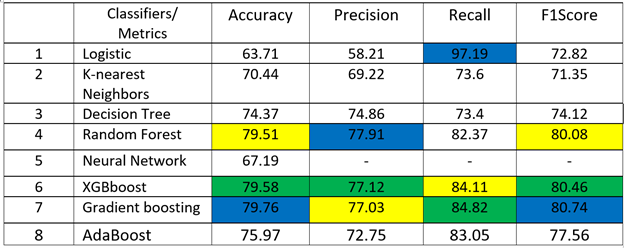


As shown in the table, the models were evaluated on four metrics; accuracy,precision, recall and F1 score. 
The blue color shows the higest score in specific metric. eg:logistic regression showed the highest recall rate, therefore its row is colored blue.
Similary green and yellow represent the second and third highest values respectively.

As can be seen from the table, except neural networks and logistic regression, all models scored fairly above 70% in all metrices. Especially the boosting classifiers showed well balanced result over all metrics.

Based on the overall performance XGboost, Gradient boosting and Random Forest are the best models. At different instances , their result was close to each other and always around 80% in all metrics.
Logistic regression although having extremely high precission, its accuracy is very low in comparison to others. 




In [ ]:
'''
Now that the most effective models have been selected.
It is time to fine tune the system.
The tree best models are RandomForest, gradient boost and xgboost. However, since the 3 models 
have similar recall and precision output it would be wise to consider logistic regression as additional
if ensembled model is to be created.

Before Ensebling is tested, however, each model will be fine tunned to find the best results.

1. Fine-tune the hyperparameters using cross-validation.
• Treat your data transformation choices as hyperparameters, especially when
you are not sure about them (eg. should I replace missing values with zero or
with the median value? Or just drop the rows?).
• Unless there are very few hyperparameter values to explore, prefer random
search over grid search. If training is very long, you may prefer a Bayesian
optimization approach (eg. using Gaussian process priors1).
2. Try ensemble methods. Combining your best models will often perform better
than running them individually.
3. Once you are confident about your final model, measure its performance on the
test set to estimate the generalization error.
'''

'\nNow that the most effective models have been selected.\nIt is time to fine tune the system.\nThe tree best models are RandomForest, gradient boost and xgboost. However, since the 3 models \nhave similar recall and precision output it would be wise to consider logistic regression as additional\nif ensembled model is to be created.\n\nBefore Ensebling is tested, however, each model will be fine tunned to find the best results.\n\n1. Fine-tune the hyperparameters using cross-validation.\n• Treat your data transformation choices as hyperparameters, especially when\nyou are not sure about them (eg. should I replace missing values with zero or\nwith the median value? Or just drop the rows?).\n• Unless there are very few hyperparameter values to explore, prefer random\nsearch over grid search. If training is very long, you may prefer a Bayesian\noptimization approach (eg. using Gaussian process priors1).\n2. Try ensemble methods. Combining your best models will often perform better\nthan r

In [ ]:
'''The main concept of fine tunning is that different combinations of hyperparameters are tested.
However while the system accuracy improves, the model is very likely to overfit since it is being trained 
to improve the accuracy of training and testing data.
The solution to this issue is to use cross-validation, where the data is divided into training, validation 
and testing.
Randomforest classifier has many parameter that can be tuned those include:
number of estimators,number of features, minimum sample split and many others.
Although it is impossible to test all the combinations, it possible to create an array of different setting 
combinations and randomly testing hyperparameters.
In the next section different ranges of possible settings are set for different parameters.'''

'The main concept of fine tunning is that different combinations of hyperparameters are tested.\nHowever while the system accuracy improves, the model is very likely to overfit since it is being trained \nto improve the accuracy of training and testing data.\nThe solution to this issue is to use cross-validation, where the data is divided into training, validation \nand testing.\nRandomforest classifier has many parameter that can be tuned those include:\nnumber of estimators,number of features, minimum sample split and many others.\nAlthough it is impossible to test all the combinations, it possible to create an array of different setting \ncombinations and randomly testing hyperparameters.\nIn the next section different ranges of possible settings are set for different parameters.'

In [ ]:
from sklearn.model_selection import RandomizedSearchCV      #cross_val_score(RandomForestClassifier(),input_df,output_df,cv=3)
from sklearn.model_selection import cross_val_score
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 235, 371, 507, 642, 778, 914, 1050, 1185, 1321, 1457, 1592, 1728, 1864, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state=42)
# Random search of parameters, using 4 fold cross validation, 
# search across 5 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, 
                               cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_x_sampled,train_y_sampled,)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.1min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_
tunned_rf = RandomForestClassifier(max_features=rf_random.best_params_['max_features'],
 min_samples_split= rf_random.best_params_['min_samples_split'],
 n_estimators=rf_random.best_params_['n_estimators'],
 max_depth=rf_random.best_params_['max_depth'],
 min_samples_leaf=rf_random.best_params_['min_samples_leaf']
 )
cross_val_score(tunned_rf,train_x_sampled,train_y_sampled,cv=3)
tunned_rf.fit(train_x_sampled,train_y_sampled)
tunned_rf_prediction=tunned_rf.predict(test_x_sampled)

In [ ]:
#Compare with the original randomForest
from sklearn.metrics import accuracy_score
print("Model accuracy:{0:.2f}% ".format(accuracy_score(test_y_sampled,tunned_rf_prediction)*100))
print("Model precision:{0:.2f}% ".format(precision_score(test_y_sampled,tunned_rf_prediction)*100))
print("Model Recall:{0:.2f}% ".format(recall_score(test_y_sampled,tunned_rf_prediction)*100))
print("Model F1_score:{0:.2f}% ".format(f1_score(test_y_sampled,tunned_rf_prediction)*100))
print("////////////////////////////////////////////////")
print(rf_baseline_performace)

Model accuracy:80.71% 
Model precision:77.74% 
Model Recall:86.07% 
Model F1_score:81.69% 
////////////////////////////////////////////////
{'accuracy': 79.65939533103712, 'precision': 77.82051282051282, 'recall': 82.96429938220983, 'f1_score': 80.31012674975523}


In [ ]:
# The randomforest fine tuning requires extensive computing power, for this reason only few combinations
# were tested, since the accuracy of the model is already good. It will be useful when used in stacked classifier

In [ ]:
''' Prepare features for XGboost hypertuning
 There are many parameters that can be tuned for the XGboost model 
Since it is impossible to test all combinations of hyperparameters, i will focus on the main parameters
such as number of boosting tress, max_depth,min_child_weight,subsample,colsample_bytree and learning rate
One way to tune those hyperparameters is to use grid search over different combination of parameters
but this will require extensive computing power and time that is beyond this project.
One solution is to select random combinations but still that one is not the most efficient. As a solution it
is better to select random combinations of only few parameters while the rest of the paramenters are
tuned one by one. 
'''


' Prepare features for XGboost hypertuning\n There are many parameters that can be tuned for the XGboost model \nSince it is impossible to test all combinations of hyperparameters, i will focus on the main parameters\nsuch as number of boosting tress, max_depth,min_child_weight,subsample,colsample_bytree and learning rate\nOne way to tune those hyperparameters is to use grid search over different combination of parameters\nbut this will require extensive computing power and time that is beyond this project.\nOne solution is to select random combinations but still that one is not the most efficient. As a solution it\nis better to select random combinations of only few parameters while the rest of the paramenters are\ntuned one by one. \nThe first step is, therfore,to build the baseline for comparion, the default'

In [ ]:
from sklearn.model_selection import GridSearchCV 
#Lets take the default parameter setting and find optimal depth
#For this purpose, we can do a grid search and test out values from 1 to 8 in steps of 100.
# gridsearch_params = [
#     (max_depth, min_child_weight)
#     for max_depth in range(1,8)
#     for min_child_weight in range(1,8)
# ]
param_xgb_depth= {'max_depth':range(1,8,1)}
param_xgb={}
xgb_gsearch1 = GridSearchCV(estimator = XGBClassifier(
                                                               random_state=10), 
param_grid = param_xgb_depth, scoring='accuracy',n_jobs=-1,iid=False, cv=5)
xgb_gsearch1.fit(train_x_sampled,train_y_sampled)
xgb_gsearch1.cv_results_, xgb_gsearch1.best_params_, xgb_gsearch1.best_score_

({'mean_fit_time': array([1.95300078, 2.66086864, 3.59968843, 4.70716295, 6.10396042,
         7.53793464, 8.65255089]),
  'mean_score_time': array([0.03100157, 0.05412951, 0.06931334, 0.09088993, 0.1168416 ,
         0.13549085, 0.16229997]),
  'mean_test_score': array([0.71233379, 0.77950754, 0.79444012, 0.80064858, 0.80396051,
         0.80611844, 0.80670698]),
  'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6, 7],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 1},
   {'max_depth': 2},
   {'max_depth': 3},
   {'max_depth': 4},
   {'max_depth': 5},
   {'max_depth': 6},
   {'max_depth': 7}],
  'rank_test_score': array([7, 6, 5, 4, 3, 2, 1], dtype=int32),
  'split0_test_score': array([0.71584353, 0.77423263, 0.79108008, 0.79748442, 0.80198477,
         0.80631202, 0.80636972]),
  'split1_test_score': array([0.71900063, 0.78143212, 0.79476083, 0.80324274, 0.80595465,
         

In [ ]:
#From above we have the optimal max_depth values
param_xgb['max_depth']=xgb_gsearch1.best_params_['max_depth']
#Similar to above code we will find optimal min_child_weight
param_xgb_min_child_weight= {'min_child_weight':range(1,8,1)}

xgb_gsearch2 = GridSearchCV(estimator = XGBClassifier(
                                                              max_depth=param_xgb['max_depth'],
                                                               random_state=10), 
param_grid = param_xgb_min_child_weight, scoring='accuracy',n_jobs=-1,iid=False, cv=5)
xgb_gsearch2.fit(train_x_sampled,train_y_sampled)
xgb_gsearch2.cv_results_, xgb_gsearch2.best_params_, xgb_gsearch2.best_score_

({'mean_fit_time': array([9.1821177 , 9.22937908, 9.38184299, 9.31283965, 9.27240319,
         9.4419662 , 8.70600905]),
  'mean_score_time': array([0.18510699, 0.17590437, 0.17193742, 0.17301073, 0.17528162,
         0.18724985, 0.1719974 ]),
  'mean_test_score': array([0.80670698, 0.80621075, 0.80664928, 0.80619923, 0.80677621,
         0.80663775, 0.80742245]),
  'param_min_child_weight': masked_array(data=[1, 2, 3, 4, 5, 6, 7],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_child_weight': 1},
   {'min_child_weight': 2},
   {'min_child_weight': 3},
   {'min_child_weight': 4},
   {'min_child_weight': 5},
   {'min_child_weight': 6},
   {'min_child_weight': 7}],
  'rank_test_score': array([3, 6, 4, 7, 2, 5, 1], dtype=int32),
  'split0_test_score': array([0.80636972, 0.80723517, 0.80694669, 0.80590815, 0.80723517,
         0.80590815, 0.80740826]),
  'split1_test_score': array([0.80970515, 0

In [ ]:
#From above we have the optimal min_child_weight values
param_xgb['min_child_weight']=xgb_gsearch2.best_params_['min_child_weight']
#Similar to above code we will find optimal min_child_weight
param_xgb_4 = {'subsample':[0.3,0.5,0.75,0.8,0.85,0.9],'colsample':[0.3,0.5,0.6,0.8,0.9,1]}
# param_xgb_3= {'subsample':[0.3,0.5.6,0.7,0.8,1],'colsample':[0.3,0.5,0.6,0.8,0.9,1]}

xgb_gsearch3 = GridSearchCV(estimator = XGBClassifier(
                                                              max_depth=param_xgb['max_depth'],
                                                              min_child_weight=param_xgb['min_child_weight'],
                                                               random_state=10), 
param_grid = param_xgb_4, scoring='accuracy',n_jobs=-1,iid=False, cv=5)
xgb_gsearch3.fit(train_x_sampled,train_y_sampled)
xgb_gsearch3.cv_results_, xgb_gsearch3.best_params_, xgb_gsearch3.best_score_

({'mean_fit_time': array([ 9.96785836, 10.7316009 , 10.29510107, 10.11996059, 10.01413727,
          9.83688154,  9.75957193, 10.79034209, 10.22822642, 10.07811742,
          9.95710316,  9.75771394,  9.7217422 , 10.64548507, 10.24227724,
         10.08457308,  9.92358518,  9.72301459,  9.66323123, 10.68862448,
         10.20335207, 10.09342542,  9.90061922,  9.73253398,  9.70948491,
         10.59807854, 10.20839968, 10.07997794,  9.92505336,  9.77662606,
          9.63633356, 10.70625873, 10.20400591, 10.0454473 ,  9.94315095,
          9.3268404 ]),
  'mean_score_time': array([0.19142346, 0.17068663, 0.16956244, 0.17489758, 0.16939502,
         0.16719093, 0.17466993, 0.17147956, 0.16995616, 0.16954308,
         0.16986923, 0.17993903, 0.17316995, 0.17119193, 0.16967616,
         0.17306819, 0.16484299, 0.16741486, 0.17326031, 0.17279272,
         0.16942387, 0.16776261, 0.17018619, 0.16798344, 0.1773108 ,
         0.16998315, 0.16959195, 0.16878538, 0.17205386, 0.16523633,
        

In [ ]:
#From above we have the optimal subsample and colsample values
# param_xgb['subsample']=xgb_gsearch3.best_params_['subsample']
# param_xgb['colsample']=xgb_gsearch3.best_params_['colsample']
param_xgb['subsample']=0.3
param_xgb['colsample']=0.9
#Similar to above code we will find optimal min_child_weight
param_xgb_3= {'eta':[.5, .4,.3,.25, .20, .15, .10, .05,0.005]}

xgb_gsearch4 = GridSearchCV(estimator = XGBClassifier(
                                                              max_depth=param_xgb['max_depth'],
                                                              min_child_weight=param_xgb['min_child_weight'],
                                                              subsample=param_xgb['subsample'],
                                                             colsample=param_xgb['colsample'],
                                                              random_state=10), 
param_grid = param_xgb_3, scoring='accuracy',n_jobs=-1,iid=False, cv=5)
xgb_gsearch4.fit(train_x_sampled,train_y_sampled)
xgb_gsearch4.cv_results_, xgb_gsearch4.best_params_, xgb_gsearch4.best_score_

({'mean_fit_time': array([9.90950398, 9.85269909, 9.87812185, 9.81313348, 9.87389059,
         9.81589851, 9.79375901, 9.8627459 , 9.05718918]),
  'mean_score_time': array([0.17649722, 0.17983375, 0.17715526, 0.18227758, 0.18147535,
         0.17980914, 0.17767496, 0.17962899, 0.16965919]),
  'mean_test_score': array([0.80443365, 0.80443365, 0.80443365, 0.80443365, 0.80443365,
         0.80443365, 0.80443365, 0.80443365, 0.80443365]),
  'param_eta': masked_array(data=[0.5, 0.4, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.005],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'eta': 0.5},
   {'eta': 0.4},
   {'eta': 0.3},
   {'eta': 0.25},
   {'eta': 0.2},
   {'eta': 0.15},
   {'eta': 0.1},
   {'eta': 0.05},
   {'eta': 0.005}],
  'rank_test_score': array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32),
  'split0_test_score': array([0.80238865, 0.80238865, 0.80238865, 0.80238865,

In [ ]:
#From above we have the optimal learning rate
param_xgb['eta']=xgb_gsearch4.best_params_['eta']
param_xgb

{'colsample': 0.9,
 'eta': 0.5,
 'max_depth': 7,
 'min_child_weight': 7,
 'subsample': 0.3}

In [ ]:
# Since all the significant parameters have been tuned, it is now time to train the model with the new parameters
tunned_xgb=XGBClassifier(
                        colsample=param_xgb['colsample'],
                         eta=param_xgb['eta'],
                         max_depth=param_xgb['max_depth'],
                         num_boost_round=1000,
                         min_child_weight=param_xgb['min_child_weight'],
                        subsample=param_xgb['subsample']
                         )
                         #tree_method=param_xgb['tree_method'])

cross_val_score(tunned_xgb, train_x_sampled, train_y_sampled, 
                                              cv=3, scoring='f1_macro')
tunned_xgb.fit(train_x_sampled, train_y_sampled)
xgb_tuned_model_prediction=tunned_xgb.predict(test_x_sampled)
print("Model accuracy:{0:.2f}% ".format(accuracy_score(test_y_sampled,xgb_tuned_model_prediction)*100))
print("Model precision:{0:.2f}% ".format(precision_score(test_y_sampled,xgb_tuned_model_prediction)*100))
print("Model Recall:{0:.2f}% ".format(recall_score(test_y_sampled,xgb_tuned_model_prediction)*100))
print("Model F1_score:{0:.2f}% ".format(f1_score(test_y_sampled,xgb_tuned_model_prediction)*100))

print("///////////////////////////////////////////////////")
print(xgb_baseline_performace)


Model accuracy:80.32% 
Model precision:77.08% 
Model Recall:86.29% 
Model F1_score:81.43% 
///////////////////////////////////////////////////
{'accuracy': 79.29582854955989, 'precision': 76.43692338053185, 'recall': 84.702859329725, 'f1_score': 80.3578838174274}


In [ ]:
#The last algorithm to be fine tunned is Gradient boosting
# The first parameter to be fine-tunned is n_estimators
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import GradientBoostingClassifier
#Lets take the default learning rate of 0.1 here and check the optimum number of trees for that. 
#For this purpose, we can do a grid search and test out values from 100 to 700 in steps of 100.
param_gradboost_estimators= {'n_estimators':range(100,700,100)}
param_gradboost={}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                               min_samples_split=500,
                                                               min_samples_leaf=50,
                                                               max_depth=8,max_features='sqrt',
                                                               subsample=0.8,
                                                               random_state=10), 
param_grid = param_gradboost_estimators, scoring='accuracy',n_jobs=-1,iid=False, cv=5)
gsearch1.fit(train_x_sampled,train_y_sampled)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_


({'mean_fit_time': array([ 8.43074045, 16.978297  , 25.47449117, 33.96976714, 42.42619138,
         48.88413258]),
  'mean_score_time': array([0.10961437, 0.21946869, 0.32833157, 0.43506474, 0.54892082,
         0.62379904]),
  'mean_test_score': array([0.80528758, 0.80483754, 0.80511448, 0.80374123, 0.80273728,
         0.80186022]),
  'param_n_estimators': masked_array(data=[100, 200, 300, 400, 500, 600],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 100},
   {'n_estimators': 200},
   {'n_estimators': 300},
   {'n_estimators': 400},
   {'n_estimators': 500},
   {'n_estimators': 600}],
  'rank_test_score': array([1, 3, 2, 4, 5, 6], dtype=int32),
  'split0_test_score': array([0.80486961, 0.80331179, 0.8049273 , 0.80365797, 0.8014078 ,
         0.80238865]),
  'split1_test_score': array([0.80791645, 0.80808955, 0.80728175, 0.80716635, 0.80670475,
         0.80578155]),
  'split2_test_sc

In [ ]:
# From above we have found the optimal number of tress
param_gradboost['n_estimators']=gsearch1.best_params_['n_estimators']
print(param_gradboost['n_estimators'])
# The next parameter to be tuned is max_depth 
param_test2 = {'max_depth':range(5,12,2)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                               n_estimators=param_gradboost['n_estimators'], 
                                                               max_features='sqrt', 
                                                               subsample=0.8,
                                                                random_state=10), 
param_grid = param_test2, scoring='accuracy',n_jobs=-1,iid=False, cv=5)
gsearch2.fit(train_x_sampled,train_y_sampled)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

100


({'mean_fit_time': array([ 6.06847439,  8.55505672, 14.60855598, 29.43433428]),
  'mean_score_time': array([0.07236938, 0.10043693, 0.14582267, 0.20569592]),
  'mean_test_score': array([0.80197566, 0.80580688, 0.8061877 , 0.8010409 ]),
  'param_max_depth': masked_array(data=[5, 7, 9, 11],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 5},
   {'max_depth': 7},
   {'max_depth': 9},
   {'max_depth': 11}],
  'rank_test_score': array([3, 2, 1, 4], dtype=int32),
  'split0_test_score': array([0.79915763, 0.80521579, 0.80521579, 0.80106162]),
  'split1_test_score': array([0.80503145, 0.80820495, 0.80820495, 0.80105014]),
  'split2_test_score': array([0.80162714, 0.80439675, 0.80508915, 0.79879984]),
  'split3_test_score': array([0.80151174, 0.80531995, 0.80410825, 0.80047314]),
  'split4_test_score': array([0.80255034, 0.80589695, 0.80832035, 0.80381974]),
  'std_fit_time': array([0.04855254, 0.0261356 , 0.1660

In [ ]:
# From above we have found the optimal number of tress
param_gradboost['max_depth']=gsearch2.best_params_['max_depth']
print(param_gradboost['max_depth'])
# The next parameters to be tuned are max_depth and min_samples_split
param_test2b = {'min_samples_split':range(300,1100,200)}
gsearch2b = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                               n_estimators=param_gradboost['n_estimators'], 
                                                              max_depth=param_gradboost['max_depth'],
                                                               max_features='sqrt', 
                                                               subsample=0.8,
                                                                random_state=10), 
param_grid = param_test2b, scoring='accuracy',n_jobs=-1,iid=False, cv=5)
gsearch2b.fit(train_x_sampled,train_y_sampled)
gsearch2b.cv_results_, gsearch2b.best_params_, gsearch2b.best_score_

9


({'mean_fit_time': array([9.92697849, 9.22304897, 8.82450233, 8.68513818]),
  'mean_score_time': array([0.12717824, 0.12187352, 0.1162663 , 0.11043339]),
  'mean_test_score': array([0.80660312, 0.80610692, 0.80592227, 0.80539144]),
  'param_min_samples_split': masked_array(data=[300, 500, 700, 900],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_samples_split': 300},
   {'min_samples_split': 500},
   {'min_samples_split': 700},
   {'min_samples_split': 900}],
  'rank_test_score': array([1, 2, 3, 4], dtype=int32),
  'split0_test_score': array([0.80625433, 0.80527348, 0.80579275, 0.8049273 ]),
  'split1_test_score': array([0.80958975, 0.80878195, 0.80762795, 0.80670475]),
  'split2_test_score': array([0.80549305, 0.80641625, 0.80566615, 0.80537765]),
  'split3_test_score': array([0.80497375, 0.80537765, 0.80555075, 0.80445445]),
  'split4_test_score': array([0.80670475, 0.80468525, 0.80497375, 0.80549305]),
  'st

In [ ]:
# From above we have found the optimal max_depth and min_samples_split
param_gradboost['min_samples_split']=gsearch2b.best_params_['min_samples_split']
print("min_samples_split: ",param_gradboost['min_samples_split'])
# The next parameter to be tuned is min_samples_leaf 
param_test3 = {'min_samples_leaf':range(30,61,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                               n_estimators=param_gradboost['n_estimators'],
                                                               max_depth=param_gradboost['max_depth'],
                                                               min_samples_split=param_gradboost['min_samples_split'],
                                                               max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='accuracy',n_jobs=-1,iid=False, cv=5)
gsearch3.fit(train_x_sampled,train_y_sampled)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

min_samples_split:  300


({'mean_fit_time': array([9.75453472, 9.7938827 , 9.65977001, 9.66025109]),
  'mean_score_time': array([0.13194504, 0.13403616, 0.12789321, 0.12148533]),
  'mean_test_score': array([0.80495293, 0.80588765, 0.8058992 , 0.80561069]),
  'param_min_samples_leaf': masked_array(data=[30, 40, 50, 60],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_samples_leaf': 30},
   {'min_samples_leaf': 40},
   {'min_samples_leaf': 50},
   {'min_samples_leaf': 60}],
  'rank_test_score': array([4, 2, 1, 3], dtype=int32),
  'split0_test_score': array([0.80417724, 0.80550427, 0.80469652, 0.80550427]),
  'split1_test_score': array([0.80745485, 0.81039755, 0.80901275, 0.80820495]),
  'split2_test_score': array([0.80381974, 0.80341584, 0.80433905, 0.80514685]),
  'split3_test_score': array([0.80445445, 0.80572385, 0.80526225, 0.80503145]),
  'split4_test_score': array([0.80485835, 0.80439675, 0.80618545, 0.80416595]),
  'std_fit_time': 

In [ ]:
# From above we have found the optimal min_samples_leaf
param_gradboost['min_samples_leaf']=gsearch3.best_params_['min_samples_leaf']
print("min_samples_leaf: ",(param_gradboost['min_samples_leaf']))
# The next parameter to be tuned is max_features 
param_test4 = {'max_features':range(2,8,1)} #since there are only 7 features
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                              n_estimators=param_gradboost['n_estimators'],
                                                              max_depth=param_gradboost['max_depth'],
                                                              min_samples_split=param_gradboost['min_samples_split'],
                                                              min_samples_leaf=param_gradboost['min_samples_leaf'],
                                                              subsample=0.8, random_state=10),
param_grid = param_test4, scoring='accuracy',n_jobs=-1,iid=False, cv=5)
gsearch4.fit(train_x_sampled,train_y_sampled)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

min_samples_leaf:  50


({'mean_fit_time': array([ 9.70646067, 11.56592345, 13.47901349, 15.35045586, 17.15114789,
         18.59766216]),
  'mean_score_time': array([0.12983098, 0.12486944, 0.12612386, 0.12537079, 0.12248187,
         0.117764  ]),
  'mean_test_score': array([0.8058992 , 0.80626849, 0.80640693, 0.80648774, 0.80644157,
         0.80607229]),
  'param_max_features': masked_array(data=[2, 3, 4, 5, 6, 7],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_features': 2},
   {'max_features': 3},
   {'max_features': 4},
   {'max_features': 5},
   {'max_features': 6},
   {'max_features': 7}],
  'rank_test_score': array([6, 4, 3, 1, 2, 5], dtype=int32),
  'split0_test_score': array([0.80469652, 0.80383106, 0.80746596, 0.80515809, 0.80590815,
         0.80567736]),
  'split1_test_score': array([0.80901275, 0.81108995, 0.80832035, 0.80855115, 0.80843575,
         0.80791645]),
  'split2_test_score': array([0.80433905,

In [ ]:
# From above we have found the optimal max_features
param_gradboost['max_features']=gsearch4.best_params_['max_features']
print("max_features:  ",(param_gradboost['max_features']))
# The next and final parameter to be tuned is subsample 
param_test5 = {'subsample':[0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                              n_estimators=param_gradboost['n_estimators'],
                                                              max_depth=param_gradboost['max_depth'],
                                                              min_samples_split=param_gradboost['min_samples_split'],
                                                              min_samples_leaf=param_gradboost['min_samples_leaf'],
                                                              max_features=param_gradboost['max_features'],
                                                              subsample=0.8, random_state=10),
param_grid = param_test5, scoring='accuracy',n_jobs=-1,iid=False, cv=5)
gsearch5.fit(train_x_sampled,train_y_sampled)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

min_samples_leaf:   50


({'mean_fit_time': array([14.02476101, 14.62811866, 15.41756697, 15.99477034, 15.55163245]),
  'mean_score_time': array([0.12466788, 0.12537651, 0.12389817, 0.12476659, 0.11946626]),
  'mean_test_score': array([0.80533374, 0.80600305, 0.80648774, 0.80645312, 0.8070301 ]),
  'param_subsample': masked_array(data=[0.7, 0.75, 0.8, 0.85, 0.9],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'subsample': 0.7},
   {'subsample': 0.75},
   {'subsample': 0.8},
   {'subsample': 0.85},
   {'subsample': 0.9}],
  'rank_test_score': array([5, 4, 2, 3, 1], dtype=int32),
  'split0_test_score': array([0.80440803, 0.80561966, 0.80515809, 0.80521579, 0.80648511]),
  'split1_test_score': array([0.80826265, 0.80918585, 0.80855115, 0.80808955, 0.80993595]),
  'split2_test_score': array([0.80583925, 0.80497375, 0.80664705, 0.80630085, 0.80537765]),
  'split3_test_score': array([0.80324274, 0.80283884, 0.80508915, 0.80566615, 0.806704

In [ ]:
param_gradboost['subsample']=gsearch5.best_params_['subsample']
# Finally tunned gradientboost model
from sklearn.metrics import accuracy_score
tunned_gradientboost=GradientBoostingClassifier(learning_rate=0.1, 
                                                              n_estimators=param_gradboost['n_estimators'],
                                                              max_depth=param_gradboost['max_depth'],
                                                              min_samples_split=param_gradboost['min_samples_split'],
                                                              min_samples_leaf=param_gradboost['min_samples_leaf'],
                                                              max_features=param_gradboost['max_features'],
                                                              subsample=param_gradboost['subsample'],
                                                               random_state=10)
tunned_gradientboost.fit(train_x_sampled,train_y_sampled)
gradientboost_tuned_prediction=tunned_gradientboost.predict(test_x_sampled)
print("Model accuracy:{0:.2f}% ".format(accuracy_score(test_y_sampled,gradientboost_tuned_prediction)*100))
print("Model precision:{0:.2f}% ".format(precision_score(test_y_sampled,gradientboost_tuned_prediction)*100))
print("Model Recall:{0:.2f}% ".format(recall_score(test_y_sampled,gradientboost_tuned_prediction)*100))
print("Model F1_score:{0:.2f}% ".format(f1_score(test_y_sampled,gradientboost_tuned_prediction)*100))

print("////////////////////////////////")
print(gb_baseline_performace)

Model accuracy:80.87% 
Model precision:77.60% 
Model Recall:86.80% 
Model F1_score:81.94% 
////////////////////////////////
{'accuracy': 79.59652288010497, 'precision': 76.65304514794938, 'recall': 85.11836422284183, 'f1_score': 80.66421428941504}


In [ ]:
'''After fine tunning each of the selected parameters, the improvement in accuracy is still acute, 
to further the improvements therefore, the results of the 3 models (random forest,xgboost and gradient boost)
with the addition of k-nearest classifier are combined to create a stacked classifier.
This classifier will take the probabilistic result of each model and compute the final prediction'''

from mlxtend.classifier import StackingClassifier
# The four models for the stacking classifier had already been created earlier, therfore no need to retrain
# the models
rr = RandomForestClassifier()
stacked_model = StackingClassifier(classifiers=[tunned_rf, tunned_gradientboost, tunned_xgb], 
                          use_probas=False,
                          meta_classifier=rr)

In [ ]:
# compare results
print('3-fold cross validation:\n')

for clf, label in zip([ tunned_rf, tunned_gradientboost, tunned_xgb,stacked_model], 
                      [
                       'Random Forest', 
                       'Gradient boost',
                       'XG boost',
                       'StackingClassifier']):
  
    scores = cross_val_score(clf, train_x_sampled, train_y_sampled, 
                                              cv=3, scoring='accuracy')
    print("accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

F1 Scores: 0.80 (+/- 0.00) [Random Forest]
F1 Scores: 0.81 (+/- 0.00) [Gradient boost]
F1 Scores: 0.80 (+/- 0.00) [XG boost]
F1 Scores: 0.80 (+/- 0.00) [StackingClassifier]


In [ ]:
stacked_model.fit(train_x_sampled,train_y_sampled)
stacked_prediction=stacked_model.predict(test_x_sampled)
print("Model accuracy:{0:.2f}% ".format(accuracy_score(test_y_sampled,stacked_prediction)*100))
print("Model precision:{0:.2f}% ".format(precision_score(test_y_sampled,stacked_prediction)*100))
print("Model Recall:{0:.2f}% ".format(recall_score(test_y_sampled,stacked_prediction)*100))
print("Model F1_score:{0:.2f}% ".format(f1_score(test_y_sampled,stacked_prediction)*100))

Model accuracy:80.80% 
Model precision:77.83% 
Model Recall:86.16% 
Model F1_score:81.78% 


In [ ]:
from sklearn.ensemble import  VotingClassifier
eclf1 = VotingClassifier(estimators=[('rf', tunned_rf), ('gb', tunned_gradientboost), ('xgb', tunned_xgb)], voting='hard')
eclf1 = eclf1.fit(train_x_sampled,train_y_sampled)
voting_prediction=eclf1.predict(test_x_sampled)
print("Model accuracy:{0:.2f}% ".format(accuracy_score(test_y_sampled,voting_prediction)*100))
print("Model precision:{0:.2f}% ".format(precision_score(test_y_sampled,voting_prediction)*100))
print("Model Recall:{0:.2f}% ".format(recall_score(test_y_sampled,voting_prediction)*100))
print("Model F1_score:{0:.2f}% ".format(f1_score(test_y_sampled,voting_prediction)*100))

Model accuracy:80.74% 
Model precision:77.59% 
Model Recall:86.45% 
Model F1_score:81.78% 


In [ ]:
# Comparing all the results, the final selected prediction model is: Gradient boosting:
'''Model accuracy:80.87% 
Model precision:77.60% 
Model Recall:86.80% 
Model F1_score:81.94% '''

'Model accuracy:80.87% \nModel precision:77.60% \nModel Recall:86.80% \nModel F1_score:81.94% '